# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [3]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [4]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [5]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
116,5,124,74,0,0,34.0,0.220,38,1
325,1,157,72,21,168,25.6,0.123,24,0
244,2,146,76,35,194,38.2,0.329,29,0
104,2,85,65,0,0,39.6,0.930,27,0
200,0,113,80,16,0,31.0,0.874,21,0


In [7]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [8]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [10]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [11]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [12]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

C:\Users\igles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary 

In [13]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [14]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4931 - loss: 0.7397 - val_accuracy: 0.4531 - val_loss: 0.7279
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 0.7284 - val_accuracy: 0.4792 - val_loss: 0.7181
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5243 - loss: 0.7179 - val_accuracy: 0.5052 - val_loss: 0.7090
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5347 - loss: 0.7081 - val_accuracy: 0.5208 - val_loss: 0.7006
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5469 - loss: 0.6989 - val_accuracy: 0.5260 - val_loss: 0.6926
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5694 - loss: 0.6902 - val_accuracy: 0.5573 - val_loss: 0.6852
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5816 - loss: 0.6821 - val_accuracy: 0.5729 - val_loss: 0.6782
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.6745 - val_accuracy: 0.5833 - v

In [41]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


In [42]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]


array([[0.4684058 ],
       [0.63890386],
       [0.26683128],
       [0.21891187],
       [0.25055093],
       [0.49234203],
       [0.04852501],
       [0.20249368],
       [0.8860893 ],
       [0.20636015]], dtype=float32)

In [43]:
y_pred_prob_nn_1[:10]

array([[0.4684058 ],
       [0.63890386],
       [0.26683128],
       [0.21891187],
       [0.25055093],
       [0.49234203],
       [0.04852501],
       [0.20249368],
       [0.8860893 ],
       [0.20636015]], dtype=float32)

Create the plot_roc function

In [44]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.760
roc-auc is 0.801


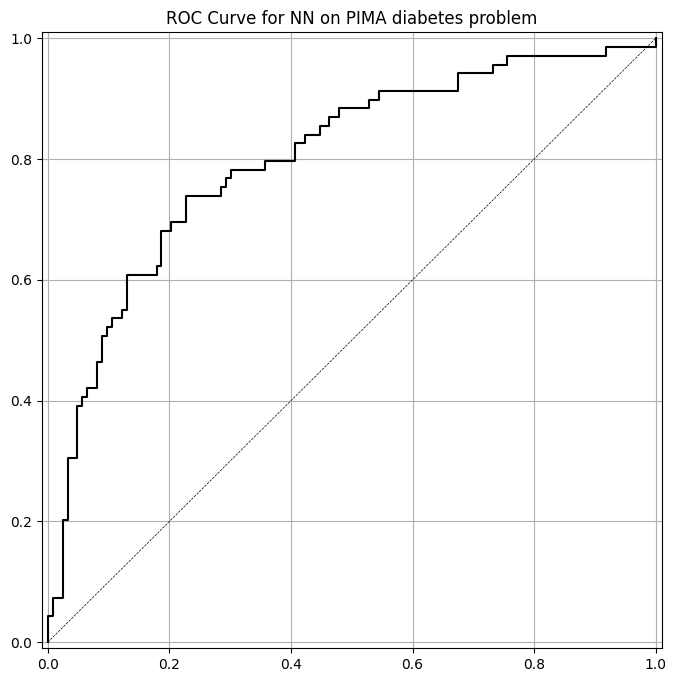

In [46]:
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))


plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [47]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

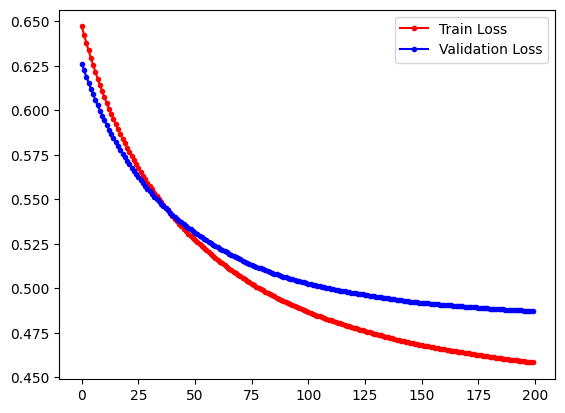

In [25]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

this shows the relation between train and validation starts with a good close line to each other but after 75 the train loss drop much compared to validation making the gap huge between them.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
model1  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

C:\Users\igles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:

model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model1.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)


Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7917 - loss: 0.4305 - val_accuracy: 0.7552 - val_loss: 0.5198
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4304 - val_accuracy: 0.7552 - val_loss: 0.5198
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4304 - val_accuracy: 0.7552 - val_loss: 0.5198
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4303 - val_accuracy: 0.7604 - val_loss: 0.5198
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4303 - val_accuracy: 0.7604 - val_loss: 0.5198
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4302 - val_accuracy: 0.7604 - val_loss: 0.5198
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4302 - val_accuracy: 0.7552 - val_loss: 0.5198
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4302 - val_accuracy: 0.

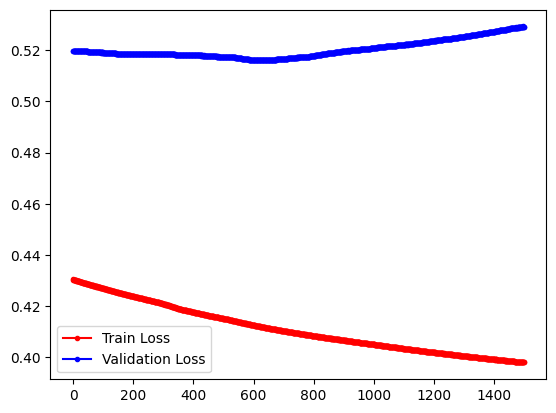

In [35]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [36]:
model1.compile(SGD(learning_rate = .01), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)


Epoch 1/1500


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8125 - loss: 0.3987 - val_accuracy: 0.7552 - val_loss: 0.5293
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8108 - loss: 0.3984 - val_accuracy: 0.7552 - val_loss: 0.5291
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.3983 - val_accuracy: 0.7552 - val_loss: 0.5295
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8108 - loss: 0.3984 - val_accuracy: 0.7552 - val_loss: 0.5296
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.3983 - val_accuracy: 0.7552 - val_loss: 0.5293
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8090 - loss: 0.3983 - val_accuracy: 0.7552 - val_loss: 0.5293
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.3982 - val_accuracy: 0.7552 - val_loss: 0.5294
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.3983 - val_accuracy: 0.7552 - val_lo

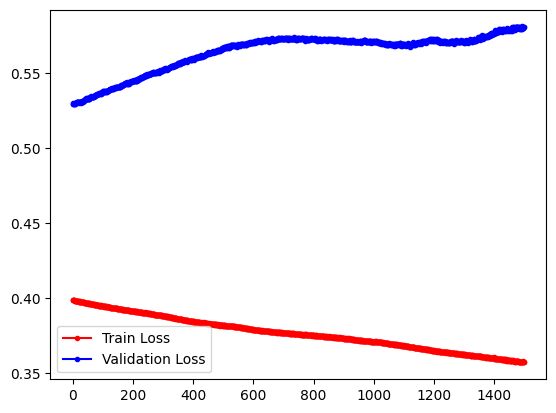

In [37]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [42]:
model1.compile(SGD(learning_rate = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)


Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8490 - loss: 0.3430 - val_accuracy: 0.7500 - val_loss: 0.6221
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.3397 - val_accuracy: 0.7448 - val_loss: 0.6240
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.3379 - val_accuracy: 0.7448 - val_loss: 0.6256
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.3374 - val_accuracy: 0.7396 - val_loss: 0.6270
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8490 - loss: 0.3368 - val_accuracy: 0.7396 - val_loss: 0.6278
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8490 - loss: 0.3367 - val_accuracy: 0.7396 - val_loss: 0.6281
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8490 - loss: 0.3366 - val_accuracy: 0.7396 - val_loss: 0.6288
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8490 - loss: 0.3364 - val_accuracy: 0.7448 - v

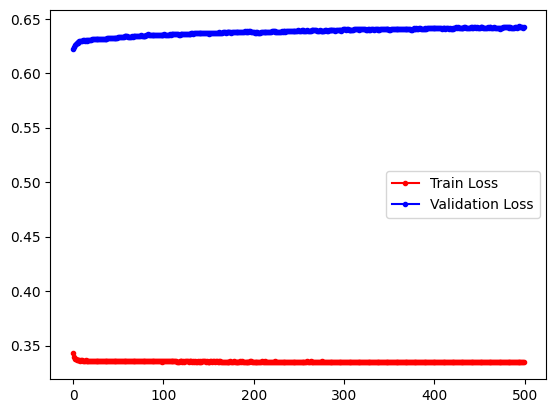

In [43]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [61]:
model2  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    #Dropout(0.3), #removed in hist 6
    Dense(6, activation="relu"),
    Dropout(0.2), # remove in hist_5
    Dense(1, activation="sigmoid")
])

C:\Users\igles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model2.compile(SGD(learning_rate = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test),validation_split=0.2, epochs=500)


Epoch 1/500


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5781 - loss: 0.7481 - val_accuracy: 0.5885 - val_loss: 0.7087
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5677 - loss: 0.7424 - val_accuracy: 0.5990 - val_loss: 0.7018
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5799 - loss: 0.7328 - val_accuracy: 0.5885 - val_loss: 0.6961
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6128 - loss: 0.7070 - val_accuracy: 0.5781 - val_loss: 0.6912
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6024 - loss: 0.7307 - val_accuracy: 0.6094 - val_loss: 0.6865
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6111 - loss: 0.7273 - val_accuracy: 0.5990 - val_loss: 0.6821
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6233 - loss: 0.7039 - val_accuracy: 0.6146 - val_loss: 0.6776
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.7095 - val_accuracy: 0.6250 - val_loss: 0.6

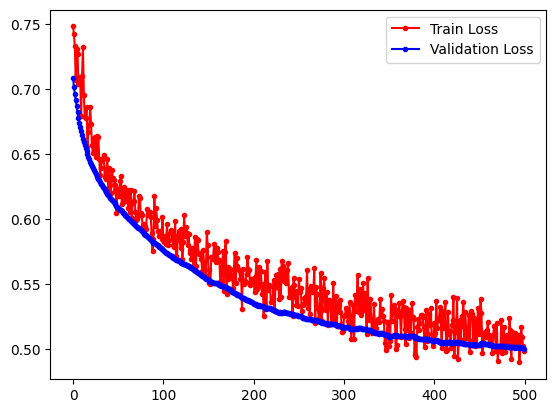

In [57]:
fig, ax = plt.subplots()
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [59]:
model2.compile(SGD(learning_rate = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_5 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test),validation_split=0.2, epochs=500)


Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6406 - loss: 0.7256 - val_accuracy: 0.6406 - val_loss: 0.6883
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6528 - loss: 0.7130 - val_accuracy: 0.6406 - val_loss: 0.6827
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6597 - loss: 0.7182 - val_accuracy: 0.6406 - val_loss: 0.6776
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.6943 - val_accuracy: 0.6406 - val_loss: 0.6739
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6545 - loss: 0.6992 - val_accuracy: 0.6406 - val_loss: 0.6703
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6597 - loss: 0.7010 - val_accuracy: 0.6406 - val_loss: 0.6667
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6458 - loss: 0.6857 - val_accuracy: 0.6406 - val_loss: 0.6637
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.6853 - val_accuracy: 0.6406 - v

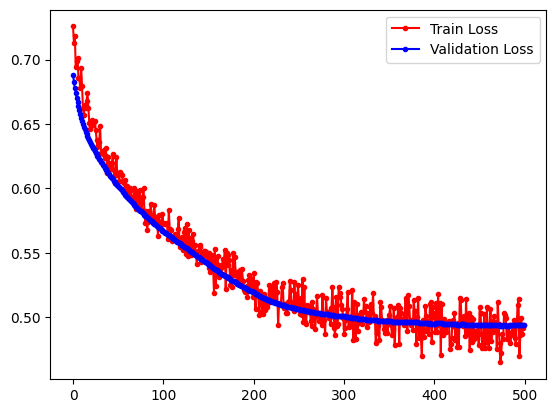

In [60]:
fig, ax = plt.subplots()
ax.plot(run_hist_5.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_5.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
model2.compile(SGD(learning_rate = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_6 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), batch_size=32,epochs=500)


Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7674 - loss: 0.4582 - val_accuracy: 0.7500 - val_loss: 0.5001
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7708 - loss: 0.4413 - val_accuracy: 0.7500 - val_loss: 0.4999
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7604 - loss: 0.4656 - val_accuracy: 0.7448 - val_loss: 0.4998
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7760 - loss: 0.4582 - val_accuracy: 0.7448 - val_loss: 0.4998
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 0.4533 - val_accuracy: 0.7500 - val_loss: 0.4997
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7795 - loss: 0.4638 - val_accuracy: 0.7500 - val_loss: 0.4998
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7726 - loss: 0.4563 - val_accuracy: 0.7500 - val_loss: 0.4997
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7708 - loss: 0.4532 - val_accuracy: 0.7500 - v

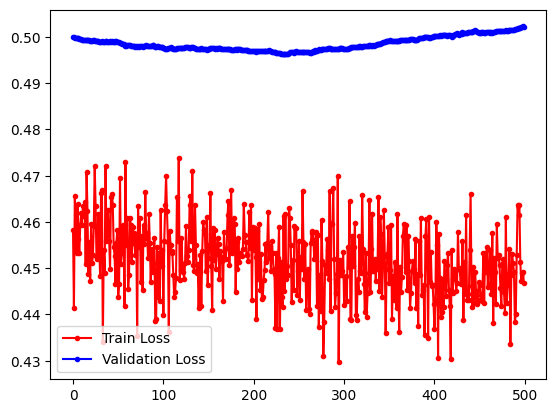

In [67]:
fig, ax = plt.subplots()
ax.plot(run_hist_6.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_6.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
model3  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

C:\Users\igles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model3.compile(SGD(learning_rate = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_7 = model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), batch_size=64,epochs=500)


Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5122 - loss: 0.7140 - val_accuracy: 0.4948 - val_loss: 0.6930
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5278 - loss: 0.7077 - val_accuracy: 0.5417 - val_loss: 0.6902
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5434 - loss: 0.7042 - val_accuracy: 0.5625 - val_loss: 0.6875
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5017 - loss: 0.7332 - val_accuracy: 0.5781 - val_loss: 0.6848
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5590 - loss: 0.7014 - val_accuracy: 0.5677 - val_loss: 0.6823
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5781 - loss: 0.6986 - val_accuracy: 0.5885 - val_loss: 0.6801
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5816 - loss: 0.7033 - val_accuracy: 0.6146 - val_loss: 0.6777
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5955 - loss: 0.7034 - val_accuracy: 0.6146 - val_loss: 0.6755

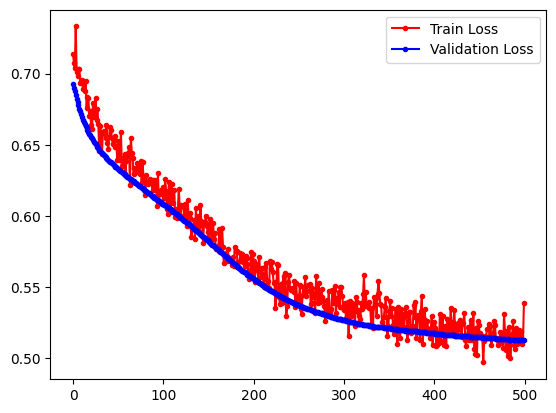

In [70]:
fig, ax = plt.subplots()
ax.plot(run_hist_7.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_7.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [72]:
model3.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_8 = model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), batch_size=64,epochs=500)

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7309 - loss: 0.5031 - val_accuracy: 0.7292 - val_loss: 0.5085
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7205 - loss: 0.5052 - val_accuracy: 0.7292 - val_loss: 0.5085
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7135 - loss: 0.5109 - val_accuracy: 0.7292 - val_loss: 0.5085
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7205 - loss: 0.5063 - val_accuracy: 0.7292 - val_loss: 0.5085
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7378 - loss: 0.4938 - val_accuracy: 0.7292 - val_loss: 0.5084
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7188 - loss: 0.5032 - val_accuracy: 0.7292 - val_loss: 0.5084
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7292 - loss: 0.5230 - val_accuracy: 0.7292 - val_loss: 0.5084
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5123 - val_accuracy: 0.7292 - val_loss: 0.5084

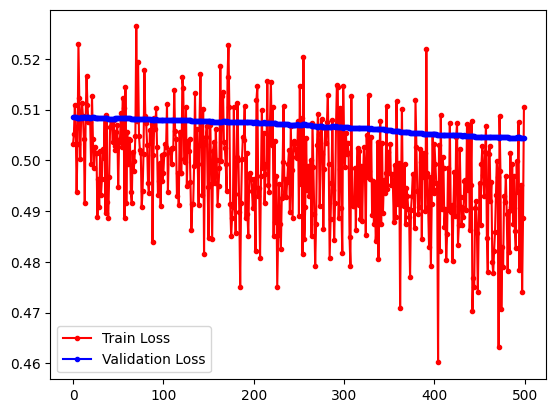

In [73]:
fig, ax = plt.subplots()
ax.plot(run_hist_8.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_8.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [74]:
model3.compile(SGD(learning_rate = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_9 = model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), batch_size=64,epochs=500)

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7135 - loss: 0.4911 - val_accuracy: 0.7500 - val_loss: 0.5044
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7118 - loss: 0.4988 - val_accuracy: 0.7500 - val_loss: 0.5044
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7240 - loss: 0.4933 - val_accuracy: 0.7500 - val_loss: 0.5044
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7292 - loss: 0.4919 - val_accuracy: 0.7500 - val_loss: 0.5044
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7465 - loss: 0.4840 - val_accuracy: 0.7500 - val_loss: 0.5044
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7274 - loss: 0.4867 - val_accuracy: 0.7500 - val_loss: 0.5044
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7118 - loss: 0.4996 - val_accuracy: 0.7500 - val_loss: 0.5044
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7396 - loss: 0.4950 - val_accuracy: 0.7500 - val_loss: 0.5044

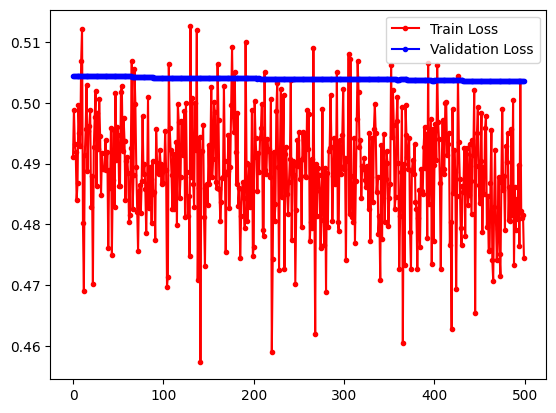

In [75]:
fig, ax = plt.subplots()
ax.plot(run_hist_9.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_9.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [83]:
model2.compile(SGD(learning_rate = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_10 = model2.fit(X_train_norm, y_train, validation_split= 0.2,epochs=500,verbose = 1,batch_size=32)


Epoch 1/500


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8000 - loss: 0.4204 - val_accuracy: 0.7586 - val_loss: 0.5259
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8239 - loss: 0.4003 - val_accuracy: 0.7586 - val_loss: 0.5265
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7978 - loss: 0.4143 - val_accuracy: 0.7586 - val_loss: 0.5263
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7978 - loss: 0.4259 - val_accuracy: 0.7586 - val_loss: 0.5264
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7935 - loss: 0.4171 - val_accuracy: 0.7586 - val_loss: 0.5262
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7848 - loss: 0.4209 - val_accuracy: 0.7586 - val_loss: 0.5260
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8043 - loss: 0.4139 - val_accuracy: 0.7586 - val_loss: 0.5260
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8174 - loss: 0.4008 - val_accuracy: 0.7586 - val_loss: 0.

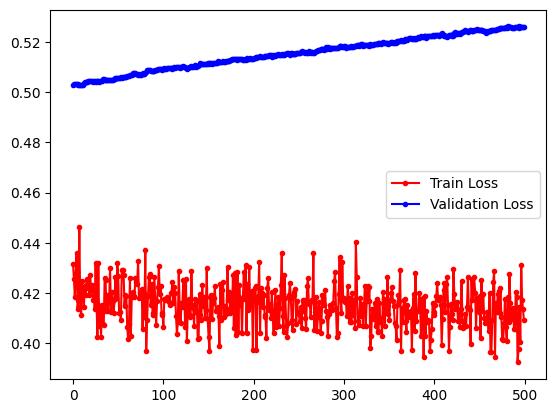

In [82]:
fig, ax = plt.subplots()
ax.plot(run_hist_10.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_10.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Conclusion

Doing this activity requires patience to find some suitable or needed implementation that will be good in terms of not only the accuracy of the model but the graphs including the train and validation loss. In this activity i learn how to find or adjust my model as it fits above it took me a moment to find or not find if my model is good its no just total of 9 hist cause i always edit the code bar if it not good fit for the model. So far i see hist.7 as a good model with an accuracy of 70 % (not an ideal but im looking for good train and validation loss). i use ai in this activity it suggest using validation split in this model now i don't know how it works it just says that it split the train set aasdnd shuffling them in validation set ring if what stages this happen ist from t